In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from scipy import ndimage
from skimage.measure import regionprops
from skimage import io
from skimage.filters import threshold_otsu   # For finding the threshold for grayscale to binary conversion
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops
import tensorflow.compat.v1 as tf          #for tf.placeholder
tf.disable_v2_behavior()
import keras

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


## Path defined

In [2]:
genuine_image_paths = "D:\\SY COLLEGE\\EDI\\Dataset\\real/"
forged_image_paths = "D:\\SY COLLEGE\\EDI\\Dataset\\forged/"

## Preprocessing the image

(191, 88)
PNG
RGB


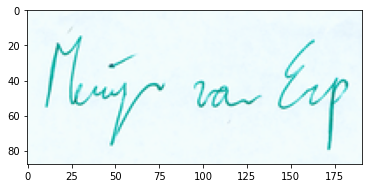

In [3]:
img=Image.open("001001_000.png")


img.show()#to open on pc
plt.imshow(img)#to display

print(img.size)
print(img.format)
print(img.mode)


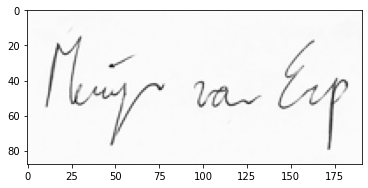

In [4]:
def rgbgrey(img):
    # Converts rgb to grayscale
    
    #img.shape[0] gives us the number of rows of image
    #img.shape[1] gives us the number of columns of image
    #np.zeros() func gives us the new array with specified no of rows and colums filled with 0
    greyimg = np.zeros((img.shape[0], img.shape[1]))
    
    #len() gives us length of image
    for row in range(len(img)):
        for col in range(len(img[row])):
            greyimg[row][col] = np.average(img[row][col])
            #The numpy.average() function computes the weighted average of elements in an array
    return greyimg

img = np.array(img)#first to convert image in nparray
greyimg = np.zeros((img.shape[0], img.shape[1]))#create an img array with 0
for row in range(len(img)):
    for col in range(len(img[row])):
            greyimg[row][col] = np.average(img[row][col])#converting to grey
           # print(greyimg[row][col])
plt.imshow(greyimg, cmap = matplotlib.cm.Greys_r)#display
plt.show()

216.27844687450857


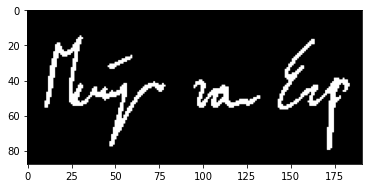

In [5]:
def greybin(img):
    # Converts grayscale to binary
    blur_radius = 0.8
    img = ndimage.gaussian_filter(img, blur_radius)  # to remove small components or noise
    thres = threshold_otsu(img)
    binimg = img > thres
    binimg = np.logical_not(binimg)#This is a logical function that computes the truth value of NOT arr element-wise.
    return binimg

blur_radius = 0.8
greyimg = ndimage.gaussian_filter(greyimg, blur_radius)  # to remove small components or noise
# img = ndimage.binary_erosion(img).astype(img.dtype)
thres = threshold_otsu(greyimg)#setting an optimal threshold value
print(thres)
binimg = greyimg > thres#value above is 1 below 0
binimg = np.logical_not(binimg)#to reverse colors
plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
plt.show()

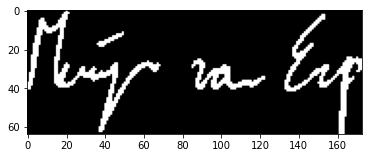

In [6]:
def preproc(path, img=None, display=True):
    if img is None:
        img = mpimg.imread(path)
    if display:
        plt.imshow(img)#The imshow() function in pyplot module of matplotlib library is used to display data as an image
        plt.show()
    grey = rgbgrey(img) #rgb to grey
    if display:
        #cmap = This parameter is a colormap instance or registered colormap name.
        plt.imshow(grey, cmap = matplotlib.cm.Greys_r)
        plt.show()
    binimg = greybin(grey) #grey to binary
    if display:
        plt.imshow(binimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
        
    #numpy.where(condition) function returns the indices of elements in an input array where the given condition is satisfied.
    r, c = np.where(binimg==1)
    
    # Now we will make a bounding box with the boundary as the position of pixels on extreme.
    # Thus we will get a cropped image with only the signature part.
    signimg = binimg[r.min(): r.max(), c.min(): c.max()]
    if display:
        plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
        plt.show()
    return signimg


r, c = np.where(binimg==1)
# Now we will make a bounding box with the boundary as the position of pixels on extreme.
# Thus we will get a cropped image with only the signature part.
signimg = binimg[r.min(): r.max(), c.min(): c.max()]
plt.imshow(signimg, cmap = matplotlib.cm.Greys_r)
plt.show()

# Feature Extraction

In [7]:
def Ratio(img):
    a = 0
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                a = a+1
    total = img.shape[0] * img.shape[1]#total number of elements in array img
    return a/total

a = 0#ratio of 1:total
for row in range(len(signimg)):
    for col in range(len(signimg[0])):
        print(signimg[row][col])
        if signimg[row][col]==True:
            #print(signimg[row][col])            
            a = a+1
b= signimg.shape[0] * signimg.shape[1]
print(a,b)
print(a/b)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True


True
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
True
True
True
True
True
False
False
False
True
True
False
False
True
True
True
False
False
False
False
False
False
False
False
False
True
True
False
False
False
True
True
True
False
False
False
False
False
False
True
True
False
False
False
False
True
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
False
True
True
True
True
True
False
False
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
True
True
F

False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
True
True
True
False
False
True
True
True
False
True
True
True
True
True
True
True
False
False
False
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
True
True
True
True
True
True
True
False
False
False
False
False
True
True
True
True
True
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
False
False
1195 11072
0.10792991329479769


In [8]:
def Centroid(img):
    numOfWhites = 0
    a = np.array([0,0])
    for row in range(len(img)):
        for col in range(len(img[0])):
            if img[row][col]==True:
                b = np.array([row,col])
                
                #numpy.add() function is used when we want to compute the addition of two array. It add arguments element-wise
                a = np.add(a,b)
                
                numOfWhites += 1
    rowcols = np.array([img.shape[0], img.shape[1]])
    centroid = a/numOfWhites
    centroid = centroid/rowcols
    return centroid[0], centroid[1]

numOfWhites = 0
a = np.array([0,0])
for row in range(len(signimg)):
    for col in range(len(signimg[0])):
        if signimg[row][col]==True:
            b = np.array([row,col])
            a = np.add(a,b)
            numOfWhites += 1
rowcols = np.array([signimg.shape[0],signimg.shape[1]])
centroid = a/numOfWhites
centroid = centroid/rowcols
print(centroid[0], centroid[1])

0.48415271966527196 0.47633927491716443


In [9]:
def EccentricitySolidity(img):
    
    #The astype() function is used to cast a pandas object to a specified data type.
    
    r = regionprops(img.astype("int8"))
    return r[0].eccentricity, r[0].solidity

r = regionprops(signimg.astype("int8"))#not property of 3d image
print(r[0].eccentricity, r[0].solidity)

0.9778538046927814 0.12127055003044449


In [10]:
def SkewKurtosis(img):
    h,w = img.shape #Saving height and width
    x = range(w)  # cols value
    y = range(h)  # rows value
    #calculate projections along the x and y axes
    xp = np.sum(img,axis=0)
    yp = np.sum(img,axis=1)
    #centroid
    cx = np.sum(x*xp)/np.sum(xp)
    cy = np.sum(y*yp)/np.sum(yp)
    #standard deviation
    x2 = (x-cx)**2
    y2 = (y-cy)**2
    sx = np.sqrt(np.sum(x2*xp)/np.sum(img))
    sy = np.sqrt(np.sum(y2*yp)/np.sum(img))
    
    #skewness
    x3 = (x-cx)**3
    y3 = (y-cy)**3
    skewx = np.sum(xp*x3)/(np.sum(img) * sx**3)
    skewy = np.sum(yp*y3)/(np.sum(img) * sy**3)

    #Kurtosis
    x4 = (x-cx)**4
    y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
    kurtx = np.sum(xp*x4)/(np.sum(img) * sx**4) - 3
    kurty = np.sum(yp*y4)/(np.sum(img) * sy**4) - 3

    return (skewx , skewy), (kurtx, kurty)

h,w = signimg.shape
x = range(w)  # cols value
y = range(h)  # rows value
    #calculate projections along the x and y axes
xp = np.sum(signimg,axis=0)
yp = np.sum(signimg,axis=1)
    #centroid
cx = np.sum(x*xp)/np.sum(xp)
cy = np.sum(y*yp)/np.sum(yp)
    #standard deviation
x2 = (x-cx)**2
y2 = (y-cy)**2
sx = np.sqrt(np.sum(x2*xp)/np.sum(signimg))
sy = np.sqrt(np.sum(y2*yp)/np.sum(signimg))
    
    #skewness
x3 = (x-cx)**3
y3 = (y-cy)**3
skewx = np.sum(xp*x3)/(np.sum(signimg) * sx**3)
skewy = np.sum(yp*y3)/(np.sum(signimg) * sy**3)

    #Kurtosis
x4 = (x-cx)**4
y4 = (y-cy)**4
    # 3 is subtracted to calculate relative to the normal distribution
kurtx = np.sum(xp*x4)/(np.sum(signimg) * sx**4) - 3
kurty = np.sum(yp*y4)/(np.sum(signimg) * sy**4) - 3
print(skewx , skewy)
print(kurtx, kurty)
plt.plot

0.13659800306916595 -0.13519868192501924
-1.5357526345817079 0.14833485118568168


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [11]:
def getFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    img = preproc(path, display=display)
    ratio = Ratio(img)
    centroid = Centroid(img)
    eccentricity, solidity = EccentricitySolidity(img)
    skewness, kurtosis = SkewKurtosis(img)
    retVal = (ratio, centroid, eccentricity, solidity, skewness, kurtosis)
    return retVal

In [12]:
def getCSVFeatures(path, img=None, display=False):
    if img is None:
        img = mpimg.imread(path)
    temp = getFeatures(path, display=display)
    features = (temp[0], temp[1][0], temp[1][1], temp[2], temp[3], temp[4][0], temp[4][1], temp[5][0], temp[5][1])
    return features

# Saving the Features

In [13]:
def makeCSV():
    if not(os.path.exists('D:\\SY COLLEGE\\EDI\\Dataset\\Features')):
        os.mkdir('D:\\SY COLLEGE\\EDI\\Dataset\\Features')
        print('New folder "Features" created')
    if not(os.path.exists('D:\\SY COLLEGE\\EDI\\Dataset\\Features/Training')):
        os.mkdir('D:\\SY COLLEGE\\EDI\\Dataset\\Features/Training')
        print('New folder "Features/Training" created')
    if not(os.path.exists('D:\\SY COLLEGE\\EDI\\Dataset\\Features/Testing')):
        os.mkdir('D:\\SY COLLEGE\\EDI\\Dataset\\Features/Testing')
        print('New folder "Features/Testing" created')
    # genuine signatures path
    gpath = genuine_image_paths
    # forged signatures path
    fpath = forged_image_paths
    for person in range(1,13):
        per = ('00'+str(person))[-3:]
        print('Saving features for person id-',per)
        
        #handle object to refer to file
        with open('D:\\SY COLLEGE\\EDI\\Dataset\\Features\\Training/training_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Training set
            for i in range(0,3):
                source = os.path.join(gpath, per+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(0,3):
                source = os.path.join(fpath, '021'+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')
        
        with open('D:\\SY COLLEGE\\EDI\\Dataset\\Features\\Training/testing_'+per+'.csv', 'w') as handle:
            handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y,output\n')
            # Testing set
            for i in range(3, 5):
                source = os.path.join(gpath, per+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',1\n')
            for i in range(3,5):
                source = os.path.join(fpath, '021'+per+'_00'+str(i)+'.png')
                features = getCSVFeatures(path=source)
                handle.write(','.join(map(str, features))+',0\n')

In [14]:
makeCSV()

Saving features for person id- 001
Saving features for person id- 002
Saving features for person id- 003
Saving features for person id- 004
Saving features for person id- 005
Saving features for person id- 006
Saving features for person id- 007
Saving features for person id- 008
Saving features for person id- 009
Saving features for person id- 010
Saving features for person id- 011
Saving features for person id- 012


In [15]:
def testing(path):
    feature = getCSVFeatures(path)
    if not(os.path.exists('D:\\SY COLLEGE\\EDI\\Dataset/TestFeatures')):
        os.mkdir('D:\\SY COLLEGE\\EDI\\Dataset/TestFeatures')
    with open('D:\\SY COLLEGE\\EDI\\Dataset\\TestFeatures/testcsv.csv', 'w') as handle:
        handle.write('ratio,cent_y,cent_x,eccentricity,solidity,skew_x,skew_y,kurt_x,kurt_y\n')
        handle.write(','.join(map(str, feature))+'\n')

Enter person's id : 001
Enter path of signature image : 001001_000.png
Epoch: 0001 cost=1.481338859
Epoch: 0051 cost=1.404048562
Epoch: 0101 cost=1.205342174
Epoch: 0151 cost=1.146902680
Epoch: 0201 cost=0.565113783
Epoch: 0251 cost=0.250853270
Epoch: 0301 cost=0.243682638
Epoch: 0351 cost=0.236043513
Epoch: 0401 cost=0.223120868
Epoch: 0451 cost=0.196937159
Epoch: 0501 cost=0.157279894
Epoch: 0551 cost=0.120770194
Epoch: 0601 cost=0.090841293
Epoch: 0651 cost=0.063643359
Epoch: 0701 cost=0.041950256
Epoch: 0751 cost=0.027950021
Epoch: 0801 cost=0.019548019
Epoch: 0851 cost=0.014428939
Epoch: 0901 cost=0.011218369
Epoch: 0951 cost=0.009151114
Optimization Finished!


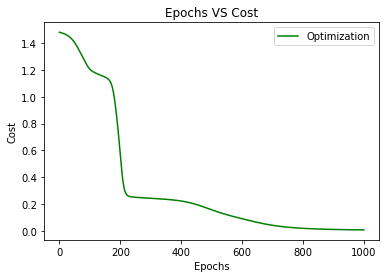

Genuine Image


True

In [16]:
n_input = 9
train_person_id = input("Enter person's id : ")
test_image_path = input("Enter path of signature image : ")
train_path = 'D:\\SY COLLEGE\\EDI\\Dataset\\Features\\Training/training_'+train_person_id+'.csv'
testing(test_image_path)
test_path = 'D:\\SY COLLEGE\\EDI\\Dataset\\TestFeatures/testcsv.csv'

def readCSV(train_path, test_path, type2=False):
    # Reading train data
    df = pd.read_csv(train_path, usecols=range(n_input))
    train_input = np.array(df.values)
    train_input = train_input.astype(np.float32, copy=False)  # Converting input to float_32
    df = pd.read_csv(train_path, usecols=(n_input,))
    temp = [elem[0] for elem in df.values]
    correct = np.array(temp)
    corr_train = keras.utils.to_categorical(correct,2)# Converting to one hot i.e converting the class pf integers to binary class matrix
    # Reading test data
    df = pd.read_csv(test_path, usecols=range(n_input))
    test_input = np.array(df.values)
    test_input = test_input.astype(np.float32, copy=False)
    if not(type2):
        df = pd.read_csv(test_path, usecols=(n_input,))
        temp = [elem[0] for elem in df.values]
        correct = np.array(temp)
        corr_test = kearas.utils.to_categorical(correct,2)      # Converting to one hot
    if not(type2):
        return train_input, corr_train, test_input, corr_test
    else:
        return train_input, corr_train, test_input

tf.reset_default_graph()
# Parameters
learning_rate = 0.001
training_epochs = 1000
#display_step = 1

# Network Parameters
n_hidden_1 = 8 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
n_hidden_3 = 30 # 3rd layer
n_classes = 2 # no. of classes (genuine or forged)

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1], seed=1)), #tf.variable represents a tensor whose value can be changed by running ops in it
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),      #tf.random_normal Outputs random values from a normal distribution.
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes], seed=2))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1], seed=3)),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes], seed=4))
}


# Create model
def multilayer_perceptron(x):
    layer_1 = tf.tanh((tf.matmul(x, weights['h1']) + biases['b1']))   
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #Adding two tensors
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']) #tf.matmul links 2 tensors to create a matrix multiplication tensor.
    out_layer = tf.tanh(tf.matmul(layer_1, weights['out']) + biases['out'])
    return out_layer

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer

loss_op = tf.reduce_mean(tf.squared_difference(logits, Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# For accuracies
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#print(accuracy)

# Initializing the variables
init = tf.global_variables_initializer()#runs all the initialization ops of all variables inside a session

def evaluate(train_path, test_path, type2=False):   
    if not(type2):
        train_input, corr_train, test_input, corr_test = readCSV(train_path, test_path)
    else:
        train_input, corr_train, test_input = readCSV(train_path, test_path, type2)
    with tf.Session() as sess:# Open a session to execute the default graph. 
        sess.run(init)# Compute the result for init
        # Training cycle
        costs=[]
        for epoch in range(training_epochs):
            # Run optimization op (backprop) and cost op (to get loss value)
            _, cost = sess.run([train_op, loss_op], feed_dict={X: train_input, Y: corr_train})  
            costs.append(cost)

            if cost<0.0001:
                break
#             # Display logs per epoch step
            if epoch % 50 == 0:
                print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(cost))
            accuracy1 =  accuracy.eval({X: train_input, Y: corr_train})

        print("Optimization Finished!")

        #costs.shape
        epochs = range(0,1000)
        plt.plot(epochs, costs, 'g',label = "Optimization")
        plt.title('Epochs VS Cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()
    
        if type2 is False:
            accuracy2 =  accuracy.eval({X: test_input, Y: corr_test})
            return accuracy1, accuracy2
        else:
            prediction = pred.eval({X: test_input})
            if prediction[0][1]>prediction[0][0]:
                print('Genuine Image')
                return True
            else:
                print('Forged Image')
                
                return False

evaluate(train_path, test_path, type2=True)